## The Spark Foundation (GRIP)
## GRIPNOV20
### Task 2 : Prediction using Unsupervised Machine Learning Algorithm.
### Dataset : Iris_data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = pd.read_csv('C:/Users/Taufiq/Desktop/Excel_Data/Iris.csv' , header = 0)

## Data Preprocessing 
1. check any outlier in datasets?
2. any missing Value in datasets?
3. if any colunm not reqiured how to remove it?

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.shape

(150, 6)

In [7]:
iris.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-seto

In [8]:
format(iris.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


'None'

In [9]:
iris.drop('Id' , inplace = True , axis = 1)

In [10]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
iris.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [12]:
import warnings 
warnings.filterwarnings('ignore')

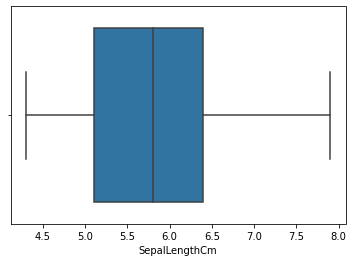

In [13]:
sns.boxplot(iris['SepalLengthCm'])

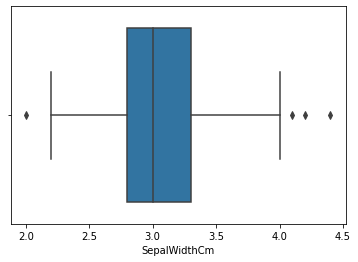

In [14]:
sns.boxplot(iris['SepalWidthCm'])

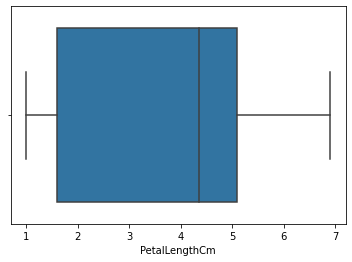

In [15]:
sns.boxplot(iris['PetalLengthCm'])

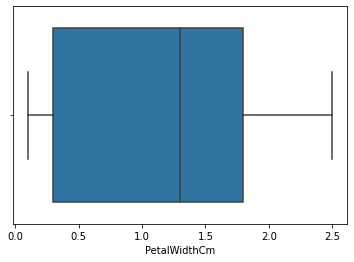

In [16]:
sns.boxplot(iris['PetalWidthCm'])

In [17]:
def outlier_detect(iris):
    for i in iris.describe().columns:
        Q1 = iris.describe().at['25%' , 1]
        Q3 = iris.describe().at['75%' , 1]
        IQR = Q3 - Q1
        LTV = Q1-1.5*IQR
        UTV = Q3 + 1.5*IQR
        iris[i] = iris[i].mask(iris[i]<LTY , LTV)
        iris[i] = iris[i].mask(iris[i]<UTV , UTV)
        
    return iris   

In [18]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [20]:
iris['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

## Correlation Between Each Variable

In [21]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


[Text(0, 0, 'SepalLengthCm'),
 Text(0, 0, 'SepalWidthCm'),
 Text(0, 0, 'PetalLengthCm'),
 Text(0, 0, 'PetalWidthCm'),
 Text(0, 0, 'Species')]

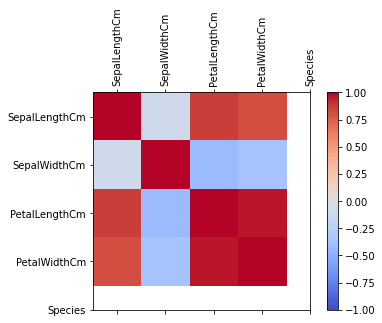

In [22]:
iris1 = iris.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(iris1 , cmap = 'coolwarm' , vmin = -1 , vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0 , len(iris.columns) , 1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(iris.columns)

ax.set_yticklabels(iris.columns)

## Heat_Map 

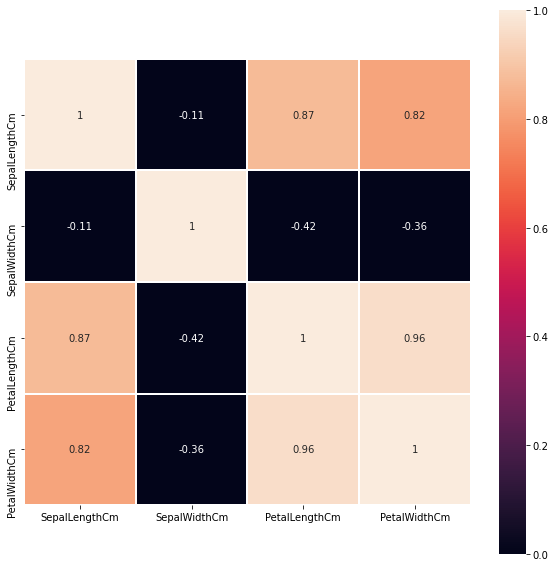

In [23]:
fig.ax =plt.subplots(figsize = (10 , 10))
sns.heatmap(iris1 , vmin = 0 , vmax = 1 , square = True , annot = True , Linewidth = 1)

## Pair Plot

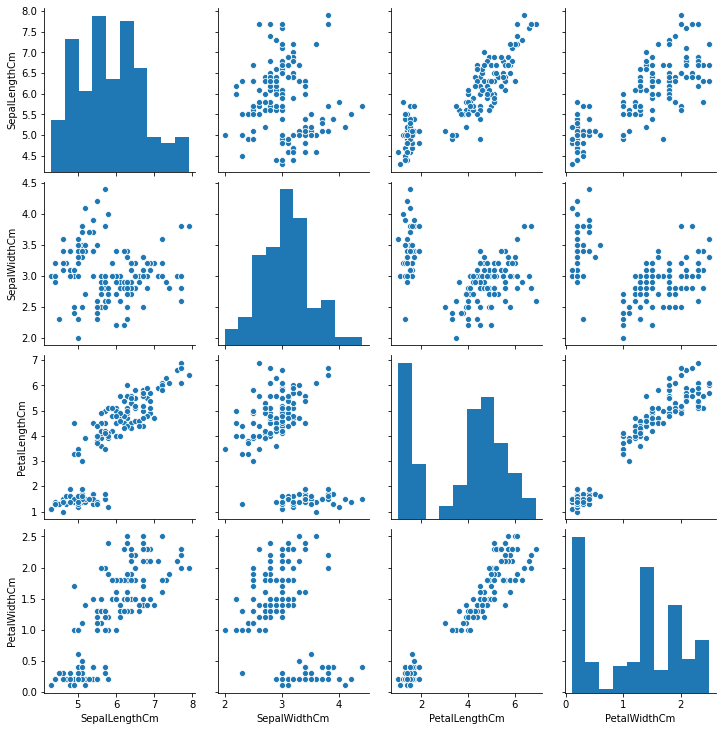

In [24]:
sns.pairplot(iris)

In [25]:
pd.DataFrame.drop_duplicates(iris)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Finding the optimum number of cluster for K-means Classificatioon

In [26]:
x = iris.iloc[: , [0 , 1 , 2, 3]].values

from sklearn.cluster import KMeans
wcss = []


for i in range (1,11) : 
    kmeans = KMeans(n_clusters = i , init = 'k-means++' , max_iter = 300 , n_init = 10 , random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


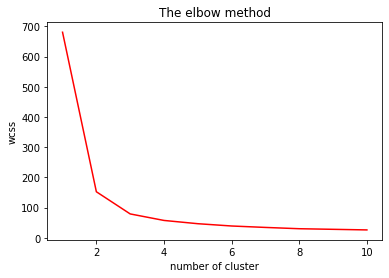

In [27]:
plt.plot(range(1,11) , wcss , color = 'red')
plt.title('The elbow method')
plt.xlabel('number of cluster')
plt.ylabel('wcss')
plt.show()

In [28]:
kmeans = KMeans(n_clusters = 3 , init = 'k-means++' ,  max_iter = 300 , n_init = 10 , random_state = 0)
y_kmeans = kmeans.fit_predict(x)

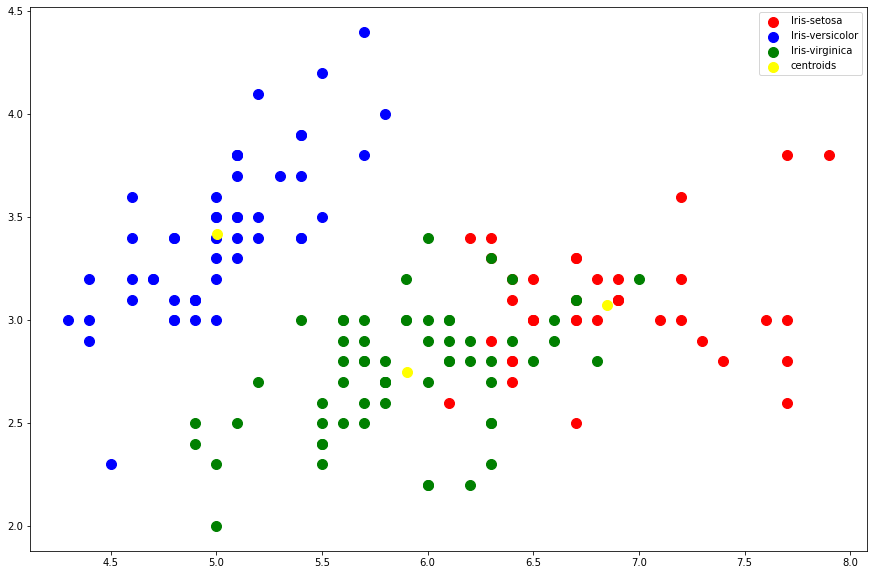

In [30]:
plt.figure(figsize=(15,10))
plt.scatter(x[y_kmeans==0,0] , x[y_kmeans==0,1] , s=100 ,c='red' , label ='Iris-setosa')
plt.scatter(x[y_kmeans==1,0] , x[y_kmeans==1,1] , s=100 ,c='blue' , label ='Iris-versicolor')
plt.scatter(x[y_kmeans==2,0] , x[y_kmeans==2,1] , s=100 ,c='green' , label ='Iris-virginica')


plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1] , s=100 , c='yellow' , label ='centroids')

plt.legend()